<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/DS_C3_SC2_JESUSADRIANAGUILARPEREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install geopandas

In [3]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely as shp
from shapely.geometry import Point, Polygon, LineString

Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.

In [4]:
mex = geopandas.read_file ('/content/gdrive/MyDrive/Data scientist/Geopandas/mexican-states.shp')
mex.head()

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/gdrive/MyDrive/Data scientist/Geopandas/mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-102.7453 21.72005, -102.74859..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.5415 19.46082, -98.54158 19.4607..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.2787 19.1317, -99.28259 19.13821..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."


Carga los datos de la localización de las sucursales de Costco® en un DataFrame.

In [5]:
Tiendas_costco = pd.read_csv ('/content/gdrive/MyDrive/Data scientist/Geopandas/TiendaCostco.csv')
Tiendas_costco.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN


In [6]:
print(Tiendas_costco.columns)

Index(['id', ' nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero'],
      dtype='object')


Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal.

In [7]:
Tiendas_costco1 = geopandas.GeoDataFrame(Tiendas_costco,geometry=geopandas.points_from_xy(Tiendas_costco[' longitud'],Tiendas_costco[' latitud']))
Tiendas_costco1.head()


,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,POINT (-98.23779 19.0335)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,POINT (-99.13006 19.4817)
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,POINT (-99.19072 19.38724)


Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:

In [8]:
Regiones = {
    'centro': ['Tlaxcala', 'Puebla', 'Ciudad de México','México','Morelos', 'Hidalgo'],
    'centro_oeste': ['Jalisco', 'Michoacán de Ocampo', 'Colima', 'Aguascalientes', 'Nayarit', 'Zacatecas', 'San Luis Potosí', 'Guanajuato', 'Querétaro'],
    'noreste': ['Chihuahua', 'Coahuila de Zaragoza', 'Nuevo León', 'Tamaulipas', 'Durango'],
    'noroeste': ['Baja California', 'Sonora', 'Sinaloa','Baja California Sur'],
    'sureste': ['Guerrero', 'Veracruz de Ignacio de la Llave', 'Oaxaca', 'Tabasco', 'Chiapas', 'Campeche', 'Yucatán', 'Quintana Roo']
}


In [9]:
def asignar_region(estado):
    for region, estados in Regiones.items():
        if estado in estados:
            return region
    return None

In [10]:
mex['Region'] = mex['name'].apply(asignar_region)
mex.head()

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry,Region
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-102.7453 21.72005, -102.74859...",centro_oeste
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884...",centro_oeste
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.5415 19.46082, -98.54158 19.4607...",centro
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.2787 19.1317, -99.28259 19.13821...",centro
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038...",centro


6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.

In [11]:
Tiendas_costco1=Tiendas_costco1.set_crs(mex.crs)
mex=mex.to_crs(epsg=3395)
Tiendas_costco1= Tiendas_costco1.to_crs(mex.crs)



Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.

In [13]:
Tiendas_costco1['geometry']=Tiendas_costco1.buffer(120000)
Tiendas_costco1.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,"POLYGON ((-10815781.179 2144952.355, -10816359..."
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,"POLYGON ((-10916064.551 2174338.736, -10916642..."
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,"POLYGON ((-10926614.869 2133365.534, -10927192..."
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,"POLYGON ((-10915108.091 2197487.393, -10915685..."
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,"POLYGON ((-10921860.248 2186403.224, -10922438..."


Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.

In [15]:
interseccion= geopandas.overlay(mex,Tiendas_costco1,how='intersection',keep_geom_type=False)

Text(0.5, 1.0, 'Área de entregas a domicilo de Costco por región')

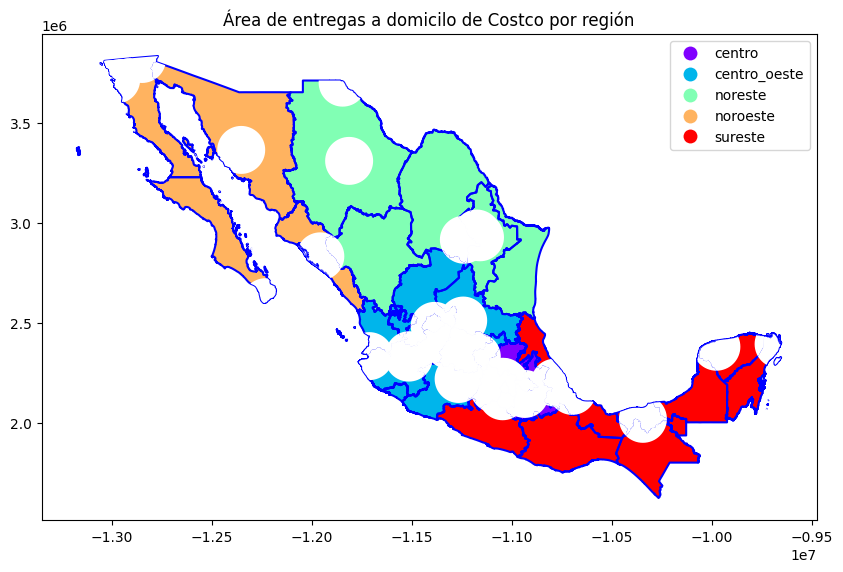

In [18]:
ax= mex.plot(column='Region',cmap='rainbow',legend=True,figsize=(10,10))
mex.boundary.plot(ax=ax,zorder=1,color='b')
interseccion.plot(ax=ax,color='w',zorder=2)
plt.title('Área de entregas a domicilo de Costco por región')

Identifica las regiones en donde se requiere más cobertura y responde la pregunta: ¿En qué regiones del país (Centro, Centro Oeste, Noreste, Noroeste, Sureste) NO es conveniente abrir una nueva sucursal debido a la falta de cobertura de entregas a domicilio?

In [29]:
Centro_area = interseccion[interseccion['Region'] == 'centro'].area.sum()
centro_oeste_area = interseccion[interseccion['Region'] == 'centro_oeste'].area.sum()
noreste_area = interseccion[interseccion['Region'] == 'noreste'].area.sum()
noroeste_area = interseccion[interseccion['Region'] == 'noroeste'].area.sum()
sureste_area = interseccion[interseccion['Region'] == 'sureste'].area.sum()
print(Centro_area)
print(centro_oeste_area)
print(noreste_area)
print(noroeste_area)
print(sureste_area)


482005078329.4619
437415339431.66797
251029338514.0544
144182754718.07785
149353649971.32684


Respuesta : De acuerdo al grafico y a los resultados anteriores no es conveniente abrir una sucursalen el sureste y noroeste ya que la cobertura es aprox 1/3 mas baja que en el Centro.